In [44]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate

import pandas as pd
font_size=25
lw=4
line_w=lw

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"
myblack="#48494B"
import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 

def openCfile(file):
    """
    Open the C txt file in order to obtain a matrix of results 
    -----------
    Input
    -----------
    file: txt file
        a file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        A matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.

# Accuracy curve with potential with a=2.5

In [48]:
from settings_and_potential_eddie import *

a=  2.5
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

## mean value of G  
###############
lab="Overdamped"
g_mean=[]
j=0
for i in range(int(len(dtlist))):
    file_i="data_a25/vec_gi="+str(i)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))
    g_mean.append(np.mean(g_vals_i))

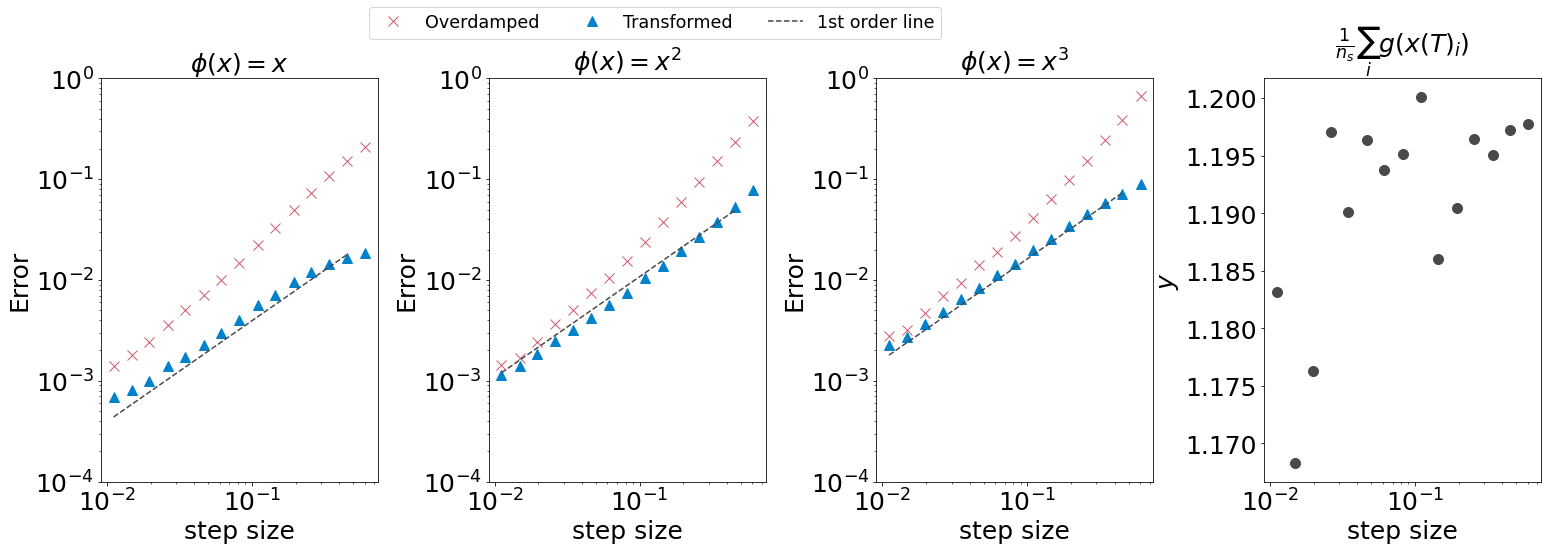

In [49]:
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_a25/noada_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a25/noada_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a25/noada_moment3.txt"))
# mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_a25/tr_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a25/tr_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a25/tr_moment3.txt"))
mom4_list=np.hstack(openCfile("data_a25/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
# ax4.loglog(xm,(mom4_list),"^",markersize=mksize,color=myblue,label=lab)


# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

ax1.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5

#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
ax2.set_ylabel("Error",fontsize=font_size)
ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

## G mean 
##########
ax4.semilogx(xm,g_mean,"o",markersize=mksize,color=myblack)
ax1.legend(fontsize=font_size*0.7,ncol=4,loc="upper center", bbox_to_anchor=(2., 1.2))

# fig.savefig("figures/moments_logplot_a25.eps")




# Accuracy plot for a=2.75


In [50]:
a=  2.75
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

## mean value of G  
###############
lab="Overdamped"
g_mean=[]
j=0
for i in range(int(len(dtlist))):
    file_i="data_a275/vec_gi="+str(i)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))
    g_mean.append(np.mean(g_vals_i))

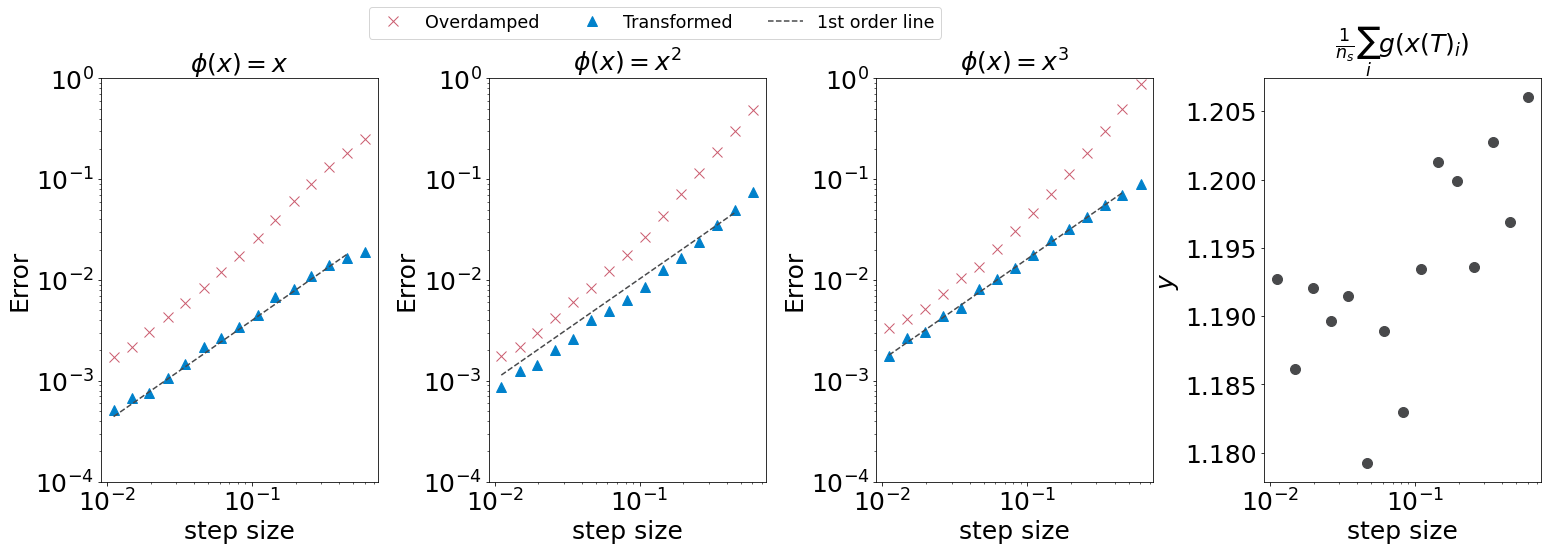

In [51]:
from settings_and_potential_eddie import *
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist)

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_a275/noada_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a275/noada_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a275/noada_moment3.txt"))
# mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_a275/tr_moment1.txt"))
mom2_list=np.hstack(openCfile("data_a275/tr_moment2.txt"))
mom3_list=np.hstack(openCfile("data_a275/tr_moment3.txt"))
mom4_list=np.hstack(openCfile("data_a275/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
# ax4.loglog(xm,(mom4_list),"^",markersize=mksize,color=myblue,label=lab)


# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

ax1.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5

#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
ax2.set_ylabel("Error",fontsize=font_size)
ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

## G mean 
##########
ax4.semilogx(xm,g_mean,"o",markersize=mksize,color=myblack)
ax1.legend(fontsize=font_size*0.7,ncol=4,loc="upper center", bbox_to_anchor=(2., 1.2))

# fig.savefig("figures/moments_logplot_a275.eps")



# Accuracy plot for a=1


In [52]:
a=  1.
b=  1.
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
range_int=[-100,100]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

## mean value of G  
###############
lab="Overdamped"
g_mean=[]
j=0
for i in range(int(len(dtlist))):
    file_i="data_easy/vec_gi="+str(i)+".txt"
    g_vals_i=np.hstack(openCfile(file_i))
    g_mean.append(np.mean(g_vals_i))

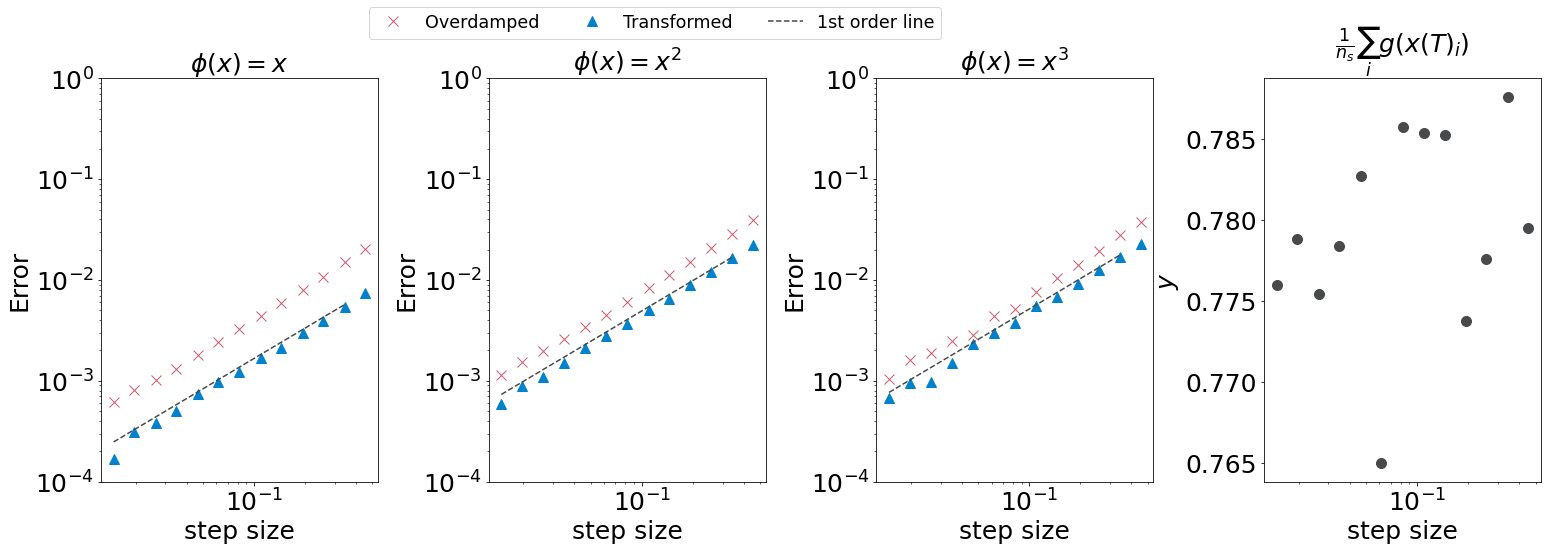

In [53]:
from settings_and_potential_eddie import *
mksize=10
# ###########################################
# ## Set up the path
# ###########################################
os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")


# ###########################################
# ## Interpolate the slope
# ###########################################
xm= (dtlist[1:-1])

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

## no adaptive 
###############
lab="Overdamped"

# Upload moments
mom1_list=np.hstack(openCfile("data_easy/noada_moment1.txt"))[1:-1]
mom2_list=np.hstack(openCfile("data_easy/noada_moment2.txt"))[1:-1]
mom3_list=np.hstack(openCfile("data_easy/noada_moment3.txt"))[1:-1]
# mom4_list=np.hstack(openCfile("data_a25/noada_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)


#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)


## Transformed 
###############
lab="Transformed"

# Upload moments
mom1_list=np.hstack(openCfile("data_easy/tr_moment1.txt"))[1:-1]
mom2_list=np.hstack(openCfile("data_easy/tr_moment2.txt"))[1:-1]
mom3_list=np.hstack(openCfile("data_easy/tr_moment3.txt"))[1:-1]
# mom4_list=np.hstack(openCfile("data_easy/tr_moment4.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
# ax4.loglog(xm,(mom4_list),"^",markersize=mksize,color=myblue,label=lab)


# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = np.log10(xm[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(xm[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(xm[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(xm[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(xm[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.loglog(xm[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

ax1.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**0]) #change to -7.5 for a=2.5

#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{n_s}\\sum_{i} g(x(T)_i)$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
ax2.set_ylabel("Error",fontsize=font_size)
ax3.set_ylabel("Error",fontsize=font_size)
ax4.set_ylabel("$y$",fontsize=font_size)

# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

## G mean 
##########
ax4.semilogx(xm,g_mean[1:-1],"o",markersize=mksize,color=myblack)
ax1.legend(fontsize=font_size*0.7,ncol=4,loc="upper center", bbox_to_anchor=(2., 1.2))

# fig.savefig("figures/moments_logplot_a25.eps")

# Underdamped spring potential 
### Spring v2: extra computation of term in step O 

In [54]:

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
a=  2.75
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

range_int=[-10,10]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

## Spring v1 vs spring v2



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


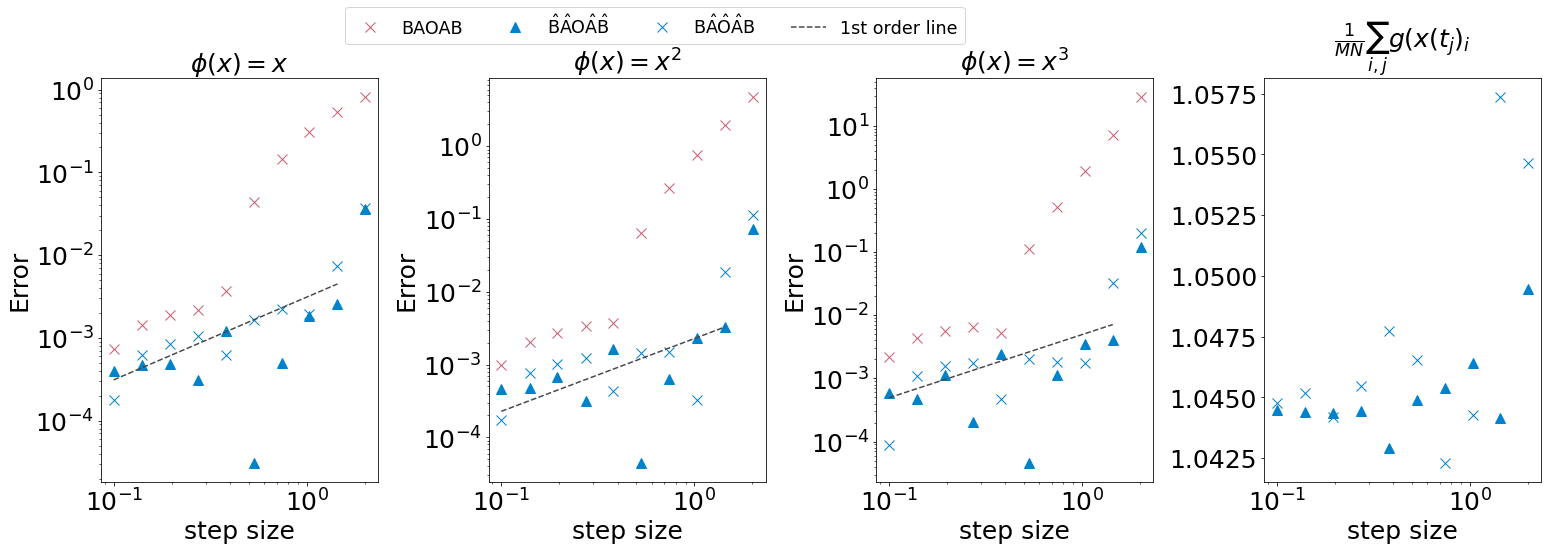

In [55]:
dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v1_108/"
path2="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v2_108/"


# ###########################################
# ## Interpolate the slope
# ###########################################
T=100
xm= (dtlist)


# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#############
## SPRING V1 
#############

## no adaptive 
###############
lab="BAOAB"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path2+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path2+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path2+"noada_moment3.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)

#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)

## Transformed 
###############
lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"

mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3.txt"))
gvals=np.hstack(openCfile(path1+"tr_moment4.txt"))


mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
ax4.semilogx(xm,(gvals),"^",markersize=mksize,color=myblue,label=lab)

#############
## SPRING V2 
#############

## Transformed 
###############
lab="B$\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}$B"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path2+"tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path2+"tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path2+"tr_moment3.txt"))
gvals=np.hstack(openCfile(path2+"tr_moment4.txt"))


mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myblue,label=lab)
ax4.semilogx(xm,(gvals),"x",markersize=mksize,color=myblue,label=lab)

#############
## PLOT PARA 
#############

# 
# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),


# ax2.plot(x, -1*x + c+8,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.plot(x, -1*x + c+8,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

# ax1.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size)
# ax2.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size)
# ax3.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size)


# ax1.set_ylim([-9,3]) #change to -7.5 for a=2.5
# ax2.set_ylim([-9,3])
# ax3.set_ylim([-9,3])
# ax4.set_ylim([1.04,1.06]) #change to -7.5 for a=2.5

# ax1.set_xlim([3.5,7.5])
# ax2.set_xlim([3.5,7.5])
# ax3.set_xlim([3.5,7.5])
# ax4.set_xlim([3.5,7.5])


#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{M N}\\sum_{i,j} g(x(t_j)_i$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
ax2.set_ylabel("Error",fontsize=font_size)
ax3.set_ylabel("Error",fontsize=font_size)
# ax4.set_ylabel("$y$",fontsize=font_size)

# ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size)


# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)


ax1.legend(fontsize=font_size*0.7,ncol=4,loc="upper center", bbox_to_anchor=(2., 1.2))
# ax2.legend(fontsize=font_size,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax3.legend(fontsize=font_size,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.7,ncol=1,loc="lower right") #,bbox_to_anchor=(0.5, -0.05))

# /home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures
fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/spring_v1_v2_compare_easy.eps")

plt.show()


### Plot for poster 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


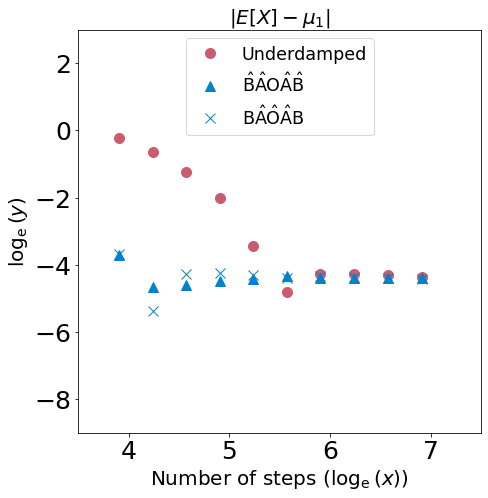

In [99]:
dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v1_108/"

path2="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v2_108/"


# ###########################################
# ## Interpolate the slope
# ###########################################
T=100
xm= np.log(T/dtlist)
lb=1
ub=-6 #len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
mk_size=10

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1)= plt.subplots(1,1,figsize=(7,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
## no adaptive 
###############
lab="Underdamped"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom1_list=np.hstack(openCfile(path2+"noada_moment1.txt"))
mom1_list=np.abs(mom1_list-true_mom_1)
#Plot moments
ax1.plot(xm,np.log(mom1_list),"o",markersize=mk_size,color=myred,label=lab)

#############
## SPRING V1 
#############

## Transformed 
###############
lab="Transformed with step $\\hat{\\rm{B}}$"
lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"

mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1.txt"))
mom1_list=np.abs(mom1_list-true_mom_1)
ax1.plot(xm,np.log(mom1_list),"^",markersize=mk_size,color=myblue,label=lab)


#############
## SPRING V2 
#############

## Transformed 
###############
lab="Transformed with step $\\hat{\\rm{O}}$"
lab="B$\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}$B"

mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path2+"tr_moment1.txt"))
mom1_list=np.abs(mom1_list-true_mom_1)
ax1.plot(xm,np.log(mom1_list),"x",markersize=mk_size,color=myblue,label=lab)

#############
## PLOT PARA 
#############
ax1.set_ylim([-9,3]) #change to -7.5 for a=2.5
ax1.set_xlim([3.5,7.5])
#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
# label of y axis
ax1.set_ylabel("$\\log_{\\rm{e}}(y)$",fontsize=font_size)
# label of x axis
ax1.set_xlabel("Number of steps ($\\log_{\\rm{e}}(x)$)",fontsize=font_size)
ax1.legend(fontsize=font_size*0.7,ncol=1,loc="upper center") #, bbox_to_anchor=(2., 1.2))
fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/poster_plot_underddamped_spring.eps")


## Spring v1 with a=4

In [56]:

## When no access to the true moment
# ###########################################
# ## Range of integration + path to save figure
#############################################
a=  4.
b=  0.1
x0= 0.5
c=  0.1
tau=0.1

# dtlist = np.array([np.exp(-3.93),np.exp(-3.36),np.exp(-2.79),np.exp(-2.21),np.exp(-1.64),np.exp(-1.07),np.exp(-0.5)])
def U(x):
    res = (a**1.5*b**0.5*x0*np.arctan((a/b)**0.5*(x-x0))+(a*b*(a*x0*(x-x0)-b))/(a*(x-x0)**2+b)+c*(x-x0)**2+2*c*(x-x0)*x0)*0.5
    return res

range_int=[-10,10]
r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm
true_mom_3 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm

path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_a4/spring_v1_108/"


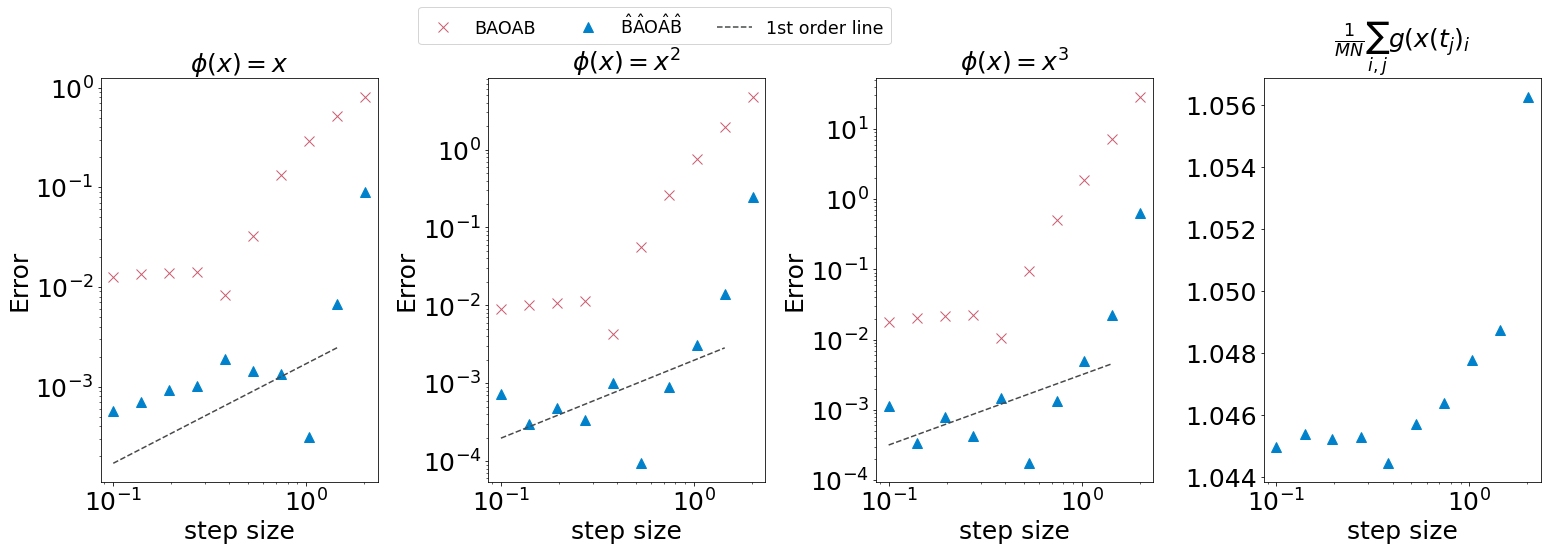

In [57]:
dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_a4/spring_v1_108/"
# path2="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_secondsim/spring_v2_108/"


# ###########################################
# ## Interpolate the slope
# ###########################################
T=100
xm= (dtlist)


# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

#############
## SPRING V1 
#############

## no adaptive 
###############
lab="BAOAB"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path2+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path2+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path2+"noada_moment3.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)

#Plot moments
ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myred,label=lab)
ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myred,label=lab)
ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myred,label=lab)

## Transformed 
###############
lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"

mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3.txt"))
gvals=np.hstack(openCfile(path1+"tr_moment4.txt"))


mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.loglog(xm,(mom1_list),"^",markersize=mksize,color=myblue,label=lab)
ax2.loglog(xm,(mom2_list),"^",markersize=mksize,color=myblue,label=lab)
ax3.loglog(xm,(mom3_list),"^",markersize=mksize,color=myblue,label=lab)
ax4.semilogx(xm,(gvals),"^",markersize=mksize,color=myblue,label=lab)

#############
## SPRING V2 
#############

# ## Transformed 
# ###############
# lab="B$\\hat{\\rm{A}}\\hat{\\rm{O}}\\hat{\\rm{A}}$B"
# mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# # Upload moments
# mom1_list=np.hstack(openCfile(path2+"tr_moment1.txt"))
# mom2_list=np.hstack(openCfile(path2+"tr_moment2.txt"))
# mom3_list=np.hstack(openCfile(path2+"tr_moment3.txt"))
# gvals=np.hstack(openCfile(path2+"tr_moment4.txt"))


# mom1_list=np.abs(mom1_list-true_mom_1)
# mom2_list=np.abs(mom2_list-true_mom_2)
# mom3_list=np.abs(mom3_list-true_mom_3)
# # mom4_list=np.abs(mom4_list-true_mom_4)

# ax1.loglog(xm,(mom1_list),"x",markersize=mksize,color=myblue,label=lab)
# ax2.loglog(xm,(mom2_list),"x",markersize=mksize,color=myblue,label=lab)
# ax3.loglog(xm,(mom3_list),"x",markersize=mksize,color=myblue,label=lab)
# ax4.semilogx(xm,(gvals),"x",markersize=mksize,color=myblue,label=lab)

#############
## PLOT PARA 
#############

# 
# ## Add the first order line 
lb=0
ub=-1 #len(dtlist)+1
x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom1_list)[lb:ub]), rcond=None)[0]
ax1.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack,label="1st order line")
# ax1.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom2_list)[lb:ub]), rcond=None)[0]
ax2.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax2.text(dtlist[lb:ub][0]+.051,10**(m*x + c)[0]-0.00005,"$\\frac{\\Delta y}{\\Delta x}=$"+str(round(m,2)),color=myblue,rotation=0.,fontsize=font_size)

x = np.log10(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, np.log10((mom3_list)[lb:ub]), rcond=None)[0]
ax3.loglog(dtlist[lb:ub], 10**(1*x + c),"--",color=myblack) #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),


# ax2.plot(x, -1*x + c+8,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),
# ax3.plot(x, -1*x + c+8,"-.",color="black") #label="$y=$"+str(round(m,2))+"$x$+"+str(round(c,2)),

# ax1.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size)
# ax2.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size)
# ax3.text(4.5,-1.,"1st order line",color="black",rotation=-27,fontsize=font_size)


# ax1.set_ylim([-9,3]) #change to -7.5 for a=2.5
# ax2.set_ylim([-9,3])
# ax3.set_ylim([-9,3])
# ax4.set_ylim([1.04,1.06]) #change to -7.5 for a=2.5

# ax1.set_xlim([3.5,7.5])
# ax2.set_xlim([3.5,7.5])
# ax3.set_xlim([3.5,7.5])
# ax4.set_xlim([3.5,7.5])


#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{M N}\\sum_{i,j} g(x(t_j)_i$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
ax2.set_ylabel("Error",fontsize=font_size)
ax3.set_ylabel("Error",fontsize=font_size)
# ax4.set_ylabel("$y$",fontsize=font_size)

# ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size)


# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)


ax1.legend(fontsize=font_size*0.7,ncol=4,loc="upper center", bbox_to_anchor=(2., 1.2))
# ax2.legend(fontsize=font_size,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax3.legend(fontsize=font_size,ncol=1,loc="upper center", bbox_to_anchor=(0.5, -0.05))
# ax4.legend(fontsize=font_size*0.7,ncol=1,loc="lower right") #,bbox_to_anchor=(0.5, -0.05))

# /home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures
# fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/spring_v1_v2_compare_easy.eps")

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


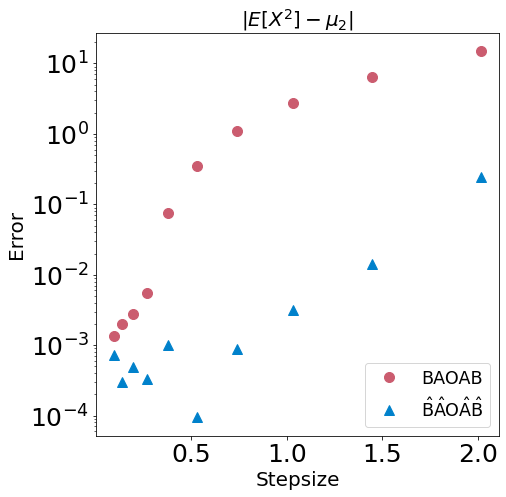

In [97]:
dtlist=np.array([0.1  , 0.14 , 0.195,0.273, 0.38 , 0.531, 0.741, 1.034, 1.443, 2.014])
# ###########################################
# ## Set up the path
# ###########################################
path1="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_a4/spring_v1_108/"

path2="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie/spring_a4/spring_v2_108/"


# ###########################################
# ## Interpolate the slope
# ###########################################
T=100
xm= (dtlist)
lb=1
ub=-6 #len(dtlist)+1
x = np.log(dtlist[lb:ub])
A = np.vstack([x, np.ones(len(x))]).T
mk_size=10

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1)= plt.subplots(1,1,figsize=(7,7))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
## no adaptive 
###############
lab="BAOAB"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))
# Upload moments
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))
mom2_list=np.abs(mom2_list-true_mom_2)
#Plot moments
ax1.semilogy(xm,(mom2_list),"o",markersize=mk_size,color=myred,label=lab)

#############
## SPRING V1 
#############

## Transformed 
###############
lab="Transformed with step $\\hat{\\rm{B}}$"
lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"


mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom2_list=np.hstack(openCfile(path1+"tr_moment2.txt"))
mom2_list=np.abs(mom2_list-true_mom_2)
ax1.semilogy(xm,(mom2_list),"^",markersize=mk_size,color=myblue,label=lab)


#############
## SPRING V2 
#############

# ## Transformed 
# ###############
# lab="Transformed with step $\\hat{\\rm{O}}$"
# mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# # Upload moments
# mom1_list=np.hstack(openCfile(path2+"tr_moment1.txt"))
# mom1_list=np.abs(mom1_list-true_mom_1)
# ax1.plot(xm,np.log(mom1_list),"x",markersize=mk_size,color=myblue,label=lab)

#############
## PLOT PARA 
#############
# ax1.set_ylim([-9,3]) #change to -7.5 for a=2.5
# ax1.set_xlim([3.5,7.5])
#label of y axis 
ax1.set_title("$\\phi(x)=x^2$",fontsize=font_size)
# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# label of x axis
ax1.set_xlabel("Stepsize",fontsize=font_size)
ax1.legend(fontsize=font_size*0.7,ncol=1,loc="lower right") #, bbox_to_anchor=(2., 1.2))
fig.savefig("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/eddie/visualisations/figures/poster_plot_underddamped_spring.eps")
